# Step 1: Importing the libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Importing dataset

In [28]:
df=pd.read_csv(r"C:\Users\Sundar\Downloads\Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Step 3: Handling the missing data

In [29]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [30]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

# for age,impute with mean value  and for salary,the missing value is of country germany, so impute with Germany's ,average salary(mean)

In [31]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.0,No
1,Spain,27.000000,48000.0,Yes
2,Germany,30.000000,54000.0,No
3,Spain,38.000000,61000.0,No
4,Germany,40.000000,NaN,Yes
5,France,35.000000,58000.0,Yes
6,Spain,38.777778,52000.0,No
7,France,48.000000,79000.0,Yes
8,Germany,50.000000,83000.0,No
9,France,37.000000,67000.0,Yes


In [32]:
df1=df.groupby(df["Country"], as_index=False).Salary.mean()
country= pd.DataFrame(df1)
country

,Country,Salary
0,France,69000.000000
1,Germany,68500.000000
2,Spain,53666.666667


In [33]:
df["Salary"]= df.groupby(['Country'],sort=False)['Salary'].apply(lambda x: x.fillna(x.mean()))
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.0,No
1,Spain,27.000000,48000.0,Yes
2,Germany,30.000000,54000.0,No
3,Spain,38.000000,61000.0,No
4,Germany,40.000000,68500.0,Yes
5,France,35.000000,58000.0,Yes
6,Spain,38.777778,52000.0,No
7,France,48.000000,79000.0,Yes
8,Germany,50.000000,83000.0,No
9,France,37.000000,67000.0,Yes


In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers

C:\Users\Sundar\AppData\Local\Temp\ipykernel_16068\3037570416.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() # gives no. of outliers


Age          0
Country      0
Purchased    0
Salary       0
dtype: int64

# Step 4: Encoding categorical data

In [34]:
df.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [35]:
df["Country"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [36]:
df["Purchased"].unique()

array(['No', 'Yes'], dtype=object)

#  the target 'Purchased' need to be label encoded, as it is a binary categorical variable

In [37]:
df["Purchased"] = df["Purchased"].map({"No" : 0, "Yes" : 1})
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.0,0
1,Spain,27.000000,48000.0,1
2,Germany,30.000000,54000.0,0
3,Spain,38.000000,61000.0,0
4,Germany,40.000000,68500.0,1
5,France,35.000000,58000.0,1
6,Spain,38.777778,52000.0,0
7,France,48.000000,79000.0,1
8,Germany,50.000000,83000.0,0
9,France,37.000000,67000.0,1


# Step 5: Creating a dummy variable

In [38]:
df = pd.get_dummies(df,columns = ["Country"]) #one hot encoding
df

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.000000,72000.0,0,1,0,0
1,27.000000,48000.0,1,0,0,1
2,30.000000,54000.0,0,0,1,0
3,38.000000,61000.0,0,0,0,1
4,40.000000,68500.0,1,0,1,0
5,35.000000,58000.0,1,1,0,0
6,38.777778,52000.0,0,0,0,1
7,48.000000,79000.0,1,1,0,0
8,50.000000,83000.0,0,0,1,0
9,37.000000,67000.0,1,1,0,0


In [41]:
df.dtypes

Age                float64
Salary             float64
Purchased            int64
Country_France       uint8
Country_Germany      uint8
Country_Spain        uint8
dtype: object

# Step 6: Splitting the datasets into training sets and Test sets


In [22]:
y=df['Purchased']
x=df.drop(['Purchased'], axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=4)

# Step 7: Feature Scaling

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Salary'}>],
       [<AxesSubplot:title={'center':'Purchased'}>,
        <AxesSubplot:title={'center':'Country_France'}>],
       [<AxesSubplot:title={'center':'Country_Germany'}>,
        <AxesSubplot:title={'center':'Country_Spain'}>]], dtype=object)

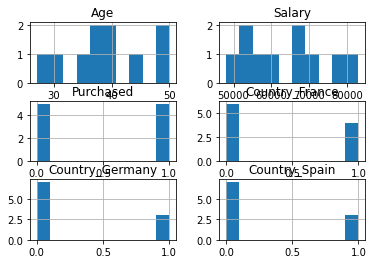

In [39]:
df.hist()

# 'Age' and 'Salary' need to be scaled by min-max scaler(normalization) as their Distribution is not Gaussian(bell-curve)

In [26]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)